# Pergunta?
Como podemos relacionar Pessoas Mortas Por Epidemias e Consumo de Energia Per Capita com HDI?
## Introdução:
No projeto 1 de Ciência de Dados, devemos cruzar os três indicadores populacionais, através da combinação de phyton com a biblioteca pandas, visando a união dos indicadores em tabelas e sua consequente relação por meio de gráficos. Sendo um dos indicadores, obrigatoriamente, o HDI (Human Development Index), os demais podem ser escolhidos a critério do aluno. Neste caso, foram escolhidos o número mortos por epidemia e consumo de energia per capita. No caso do país subdesenvolvido será questionado o quanto seu baixo HDI se relaciona com o primeiro tema escolhido, enquanto que no país desenvolvido se seu alto HDI tem relação direta com o segundo tema.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
IDH = pd.read_excel('hdi_human_development_index.xlsx')
CONSUMODEENERGIAPORPESSOA = pd.read_excel('IND.xlsx')
MORTESEPIDEMIAS = pd.read_excel('indicator_epidemic killed.xlsx')

In [68]:
HDI = IDH.loc[:,['geo',2002]]
HH = HDI.set_index("geo")

In [69]:
CONSUMO_ENERGIA_PER_CAPITA = CONSUMODEENERGIAPORPESSOA.loc[:,['Electricity consumption, per capita (kWh)','2002']]
ce = CONSUMO_ENERGIA_PER_CAPITA.set_index("Electricity consumption, per capita (kWh)")
CE=ce.dropna()

In [70]:
MORTES_EPIDEMIAS = MORTESEPIDEMIAS.loc[:,['Epidemic killed',2002]]
me = MORTES_EPIDEMIAS.set_index("Epidemic killed")
ME=me.dropna()

In [71]:
VARIFIN_1 = HH.join(ME, how="inner", lsuffix=' ', rsuffix=' ')
VARIFIN_2 = VARIFIN_1.join(CE, how='inner')
VARIFIN_2.columns=('2002-HDI','2002-Mortos Por Epidemias', '2002-Consumo De Energia Per Capita')
VARIFIN_2.head(5)

,2002-HDI,2002-Mortos Por Epidemias,2002-Consumo De Energia Per Capita
Albania,0.674,0,1459.433092
Algeria,0.663,0,714.702866
Angola,0.406,0,101.232157
Argentina,0.770,0,2017.405069
Australia,0.905,0,10813.122729


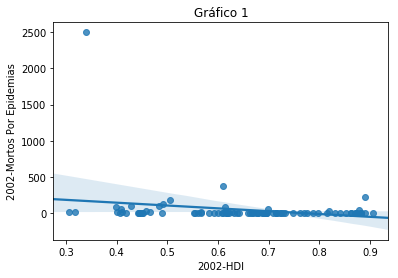

In [84]:
sns.regplot(VARIFIN_2["2002-HDI"], VARIFIN_2["2002-Mortos Por Epidemias"]);
plt.title('Gráfico 1');

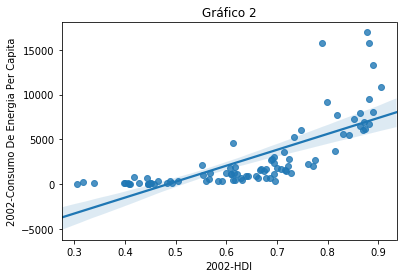

In [85]:
sns.regplot(VARIFIN_2["2002-HDI"], VARIFIN_2["2002-Consumo De Energia Per Capita"]);
plt.title('Gráfico 2');

In [87]:
VARIFIN_2.corr()

,2002-HDI,2002-Mortos Por Epidemias,2002-Consumo De Energia Per Capita
2002-HDI,1.000000,-0.228623,0.735416
2002-Mortos Por Epidemias,-0.228623,1.000000,-0.077379
2002-Consumo De Energia Per Capita,0.735416,-0.077379,1.000000


## Conclusão

Em primeiro lugar, podemos concluir que, através dos gráficos e da tabela de correlação, a teoria proposta na introdução de que epidemias matam mais pessoas em países subdesenvolvidos, é falha. Isso pode ser demonstrado pelos dados da tabela, os quais apontam que o valor está próximo de zero, ou seja o nível de correlação é baixo. A análise do gráfico 1 mostra o mesmo resultado. Logo, o HDI não é relevante para compor estimativas sobre mortes por epidemias.
Também podemos pontuar que, através dos mesmos mecanismos de análise, há uma melhor correlação entre o HDI e o consumo de energia per capita. Após a verificação de determinadas pesquisas, assinala-se que países mais desenvolvidos utilizam mais energia, o que pode ser relacionado ao fato de possuírem maior acesso às novas tecnologias que, por sua vez, necessitam de mais energia.
